# **1 Data Availability**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("Wine_Quality_Data.csv")
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [2]:
df.shape  # Checking Shape of the data

(6497, 13)

**Data Cleaning**

In [3]:
# Checking null value in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe().T.style.background_gradient(axis=0)

In [5]:
#2 check null and duplicate - do some meaningful data transformation [Column relationship identify]

# check null - If null columns are there not to delete as to client want to do other wise "under my assumption" drop the 80% null vlaue columns
# check Duplicate - before deleting records cross check weather personla ID's is ther are not because same data can be other person without personla ID's so that as to client at last.

df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [6]:
df.duplicated().sum() #Checking duplicates

np.int64(1177)

In [7]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
6427            6.4             0.230         0.35           10.30      0.042   
6449            7.0             0.360         0.35            2.50      0.048   
6450            6.4             0.330         0.44            8.90      0.055   
6455            7.1             0.230         0.39           13.70      0.058   
6479            6.6             0.340         0.40            8.10      0.046   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
6427                 54.0                 140.0  0.99670  3.23       0.47   
6449                 67.0                 161.0  0.99146  3.05       0.56   
6450                 52.0                 164.0  0.99488  3.10       0.48   
6455                 26.0                 172.0  0.99755  2.90       0.46   
6479                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality  color  
4      9.400000        5    red  
11    10.500000        5    red  
27     9.500000        5    red  
40    10.500000        5    red  
65    10.900000        5    red  
...         ...      ...    ...  
6427   9.200000        5  white  
6449  11.100000        6  white  
6450   9.600000        5  white  
6455   9.000000        6  white  
6479   9.533333        6  white  

[1177 rows x 13 columns]

In [8]:
# df data copying to df1. df what we are changing will not change in df1 so we are copying data
# df1 = df.copy() works with data
# df1 = df it will works with address
df1 = df.copy()

In [9]:
df.drop_duplicates(inplace=True) #Under the assumption we are removing the duplicates.
df.duplicated().sum() #Checking duplicates

np.int64(0)

In [10]:
#3 Spelling check - in data where all strings need to Checking spelling errors in the object column.
df["color"].unique()

array(['red', 'white'], dtype=object)

In [11]:
df[df["quality"]==3]

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
459            11.6             0.580         0.66            2.20      0.074   
517            10.4             0.610         0.49            2.10      0.200   
690             7.4             1.185         0.00            4.25      0.097   
832            10.4             0.440         0.42            1.50      0.145   
899             8.3             1.020         0.02            3.40      0.084   
1299            7.6             1.580         0.00            2.10      0.137   
1374            6.8             0.815         0.00            1.20      0.267   
1469            7.3             0.980         0.05            2.10      0.061   
1478            7.1             0.875         0.05            5.70      0.082   
1505            6.7             0.760         0.02            1.80      0.078   
1850            8.5             0.260         0.21           16.20      0.074   
1852            5.8             0.240         0.44            3.50      0.029   
1893            9.1             0.590         0.38            1.60      0.066   
2044            7.1             0.320         0.32           11.00      0.038   
2339            6.9             0.390         0.40            4.60      0.022   
2472           10.3             0.170         0.47            1.40      0.037   
2633            7.9             0.640         0.46           10.60      0.244   
2828            8.3             0.330         0.42            1.15      0.033   
3016            8.6             0.550         0.35           15.55      0.057   
3083            7.5             0.320         0.24            4.60      0.053   
3287            6.7             0.250         0.26            1.55      0.041   
3530            7.1             0.490         0.22            2.00      0.047   
3649           11.8             0.230         0.38           11.10      0.034   
3972            7.6             0.480         0.37            1.20      0.034   
4686            6.1             0.200         0.34            9.50      0.041   
4864            4.2             0.215         0.23            5.10      0.041   
4906            9.4             0.240         0.29            8.50      0.037   
5008            6.2             0.230         0.35            0.70      0.051   
5409            6.8             0.260         0.34           15.10      0.060   
6344            6.1             0.260         0.25            2.90      0.047   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
459                  10.0                  47.0  1.00080  3.25       0.57   
517                   5.0                  16.0  0.99940  3.16       0.63   
690                   5.0                  14.0  0.99660  3.63       0.54   
832                  34.0                  48.0  0.99832  3.38       0.86   
899                   6.0                  11.0  0.99892  3.48       0.49   
1299                  5.0                   9.0  0.99476  3.50       0.40   
1374                 16.0                  29.0  0.99471  3.32       0.51   
1469                 20.0                  49.0  0.99705  3.31       0.55   
1478                  3.0                  14.0  0.99808  3.40       0.52   
1505                  6.0                  12.0  0.99600  3.55       0.63   
1850                 41.0                 197.0  0.99800  3.02       0.50   
1852                  5.0                 109.0  0.99130  3.53       0.43   
1893                 34.0                 182.0  0.99680  3.23       0.38   
2044                 16.0                  66.0  0.99370  3.24       0.40   
2339                  5.0                  19.0  0.99150  3.31       0.37   
2472                  5.0                  33.0  0.99390  2.89       0.28   
2633                 33.0                 227.0  0.99830  2.87       0.74   
2828                 18.0                  96.0  0.99110  3.20       0.32   
3016                 35.5      

In [12]:
df.iloc[459]

fixed_acidity              7.0
volatile_acidity          0.38
citric_acid               0.49
residual_sugar             2.5
chlorides                0.097
free_sulfur_dioxide       33.0
total_sulfur_dioxide      85.0
density                 0.9962
pH                        3.39
sulphates                 0.77
alcohol                   11.4
quality                      6
color                      red
Name: 527, dtype: object

In [13]:
df.loc[459]

fixed_acidity             11.6
volatile_acidity          0.58
citric_acid               0.66
residual_sugar             2.2
chlorides                0.074
free_sulfur_dioxide       10.0
total_sulfur_dioxide      47.0
density                 1.0008
pH                        3.25
sulphates                 0.57
alcohol                    9.0
quality                      3
color                      red
Name: 459, dtype: object

In [14]:
#Whenever we remove the duplicates we should reset the index only for human understanding

df.reset_index(inplace=True)

In [15]:
#We are removing  index column (run only once)

df.drop("index", axis=1, inplace=True)

**DATA TRANSFORMATION**

In [16]:
#Change the object into int for the color column

df["color"] = df["color"].map({"red":0, "white":1})
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5      0  
1         9.8        5      0  
2         9.8        5      0  
3         9.8        6      0  
4         9.4        5      0  
...       ...      ...    ...  
5315     11.2        6      1  
5316      9.6        5      1  
5317      9.4        6      1  
5318     12.8        7      1  
5319     11.8        6      1  

[5320 rows x 13 columns]

In [17]:
df.info()  # Checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5320 non-null   float64
 1   volatile_acidity      5320 non-null   float64
 2   citric_acid           5320 non-null   float64
 3   residual_sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free_sulfur_dioxide   5320 non-null   float64
 6   total_sulfur_dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  color                 5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 540.4 KB


In [18]:
df.quality.value_counts()

quality
6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: count, dtype: int64

In [19]:
df["quality"] = df["quality"].map({3:0, 4:1, 5:2, 6:3, 7:4, 8:5, 9:6})
df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        2      0  
1         9.8        2      0  
2         9.8        2      0  
3         9.8        3      0  
4         9.4        2      0  
...       ...      ...    ...  
5315     11.2        3      1  
5316      9.6        2      1  
5317      9.4        3      1  
5318     12.8        4      1  
5319     11.8        3      1  

[5320 rows x 13 columns]

In [20]:
df.quality.value_counts()

quality
3    2323
2    1752
4     856
1     206
5     148
0      30
6       5
Name: count, dtype: int64

In [21]:
features = ['residual_sugar', 'total_sulfur_dioxide', 'sulphates',
                   'alcohol', 'volatile_acidity', 'quality']
df_features = df[features]

In [22]:
case_1 = (df_features['quality']==3)|(df_features['quality']==4)
case_2 = (df_features['quality']==5)|(df_features['quality']==6)
case_3 = (df_features['quality']==7)|(df_features['quality']==8)
level_34 = round(df_features[case_1].describe(),2)
level_56 = round(df_features[case_2].describe(),2)
level_78 = round(df_features[case_3].describe(),2)

In [23]:
level_all = pd.concat([level_34,level_56, level_78], axis=1, keys=['3,4','5,6','7,8',])
level_all.T

count    mean    std    min    25%     50%     75%  \
3,4 residual_sugar        3179.0    4.89   4.38   0.70   1.80    2.70    7.10   
    total_sulfur_dioxide  3179.0  111.94  53.61   6.00  78.00  114.00  148.00   
    sulphates             3179.0    0.54   0.15   0.22   0.43    0.52    0.62   
    alcohol               3179.0   10.88   1.18   8.40  10.00   10.80   11.80   
    volatile_acidity      3179.0    0.31   0.14   0.08   0.21    0.27    0.36   
    quality               3179.0    3.27   0.44   3.00   3.00    3.00    4.00   
5,6 residual_sugar         153.0    4.75   3.62   0.80   1.90    3.80    6.80   
    total_sulfur_dioxide   153.0  112.11  39.64  12.00  95.00  115.00  135.00   
    sulphates              153.0    0.52   0.17   0.25   0.38    0.49    0.62   
    alcohol                153.0   11.92   1.07   8.50  11.20   12.20   12.70   
    volatile_acidity       153.0    0.30   0.12   0.12   0.22    0.28    0.36   
    quality                153.0    5.03   0.18   5.00   5.00    5.00    5.00   
7,8 residual_sugar           0.0     NaN    NaN    NaN    NaN     NaN     NaN   
    total_sulfur_dioxide     0.0     NaN    NaN    NaN    NaN     NaN     NaN   
    sulphates                0.0     NaN    NaN    NaN    NaN     NaN     NaN   
    alcohol                  0.0     NaN    NaN    NaN    NaN     NaN     NaN   
    volatile_acidity         0.0     NaN    NaN    NaN    NaN     NaN     NaN   
    quality                  0.0     NaN    NaN    NaN    NaN     NaN     NaN   

                             max  
3,4 residual_sugar         65.80  
    total_sulfur_dioxide  294.00  
    sulphates               1.95  
    alcohol                14.20  
    volatile_acidity        1.04  
    quality                 4.00  
5,6 residual_sugar         14.80  
    total_sulfur_dioxide  212.50  
    sulphates               1.10  
    alcohol                14.00  
    volatile_acidity        0.85  
    quality                 6.00  
7,8 residual_sugar           NaN  
    total_sulfur_dioxide     NaN  
    sulphates                NaN  
    alcohol                  NaN  
    volatile_acidity         NaN  
    quality                  NaN

# **2 EDA**

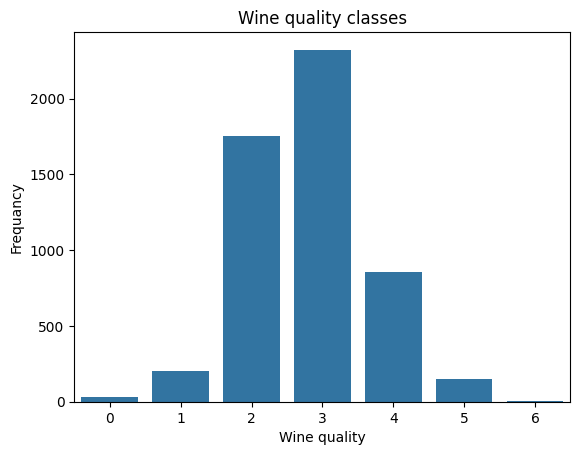

In [24]:
# Wine quality classes frequancy
sns.countplot(x= df['quality'])
plt.xlabel('Wine quality')
plt.ylabel('Frequancy')
plt.title('Wine quality classes');

<Axes: ylabel='count'>

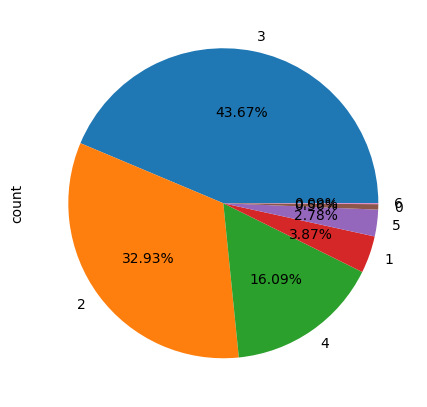

In [25]:
plt.figure(1, figsize=(5,10))
df['quality'].value_counts().plot.pie(autopct="%1.2f%%")

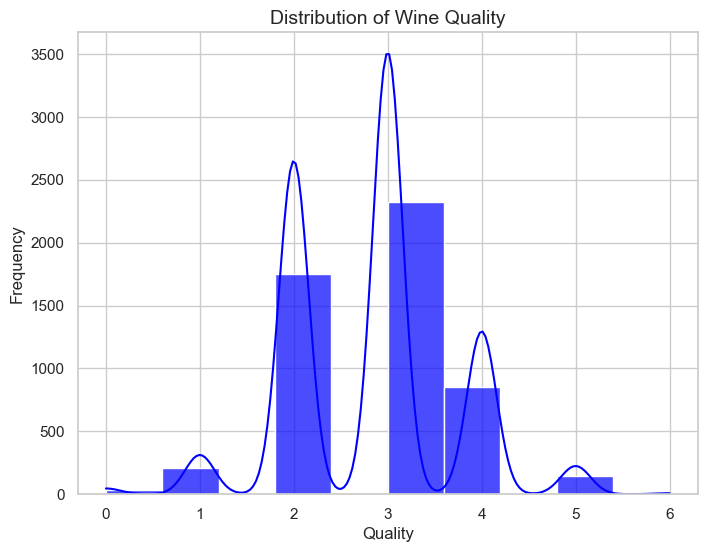

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for plots
sns.set(style="whitegrid")

# 1. Histogram of the 'quality' column
plt.figure(figsize=(8, 6))
sns.histplot(df['quality'], kde=True, bins=10, color='blue', alpha=0.7)
plt.title('Distribution of Wine Quality', fontsize=14)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

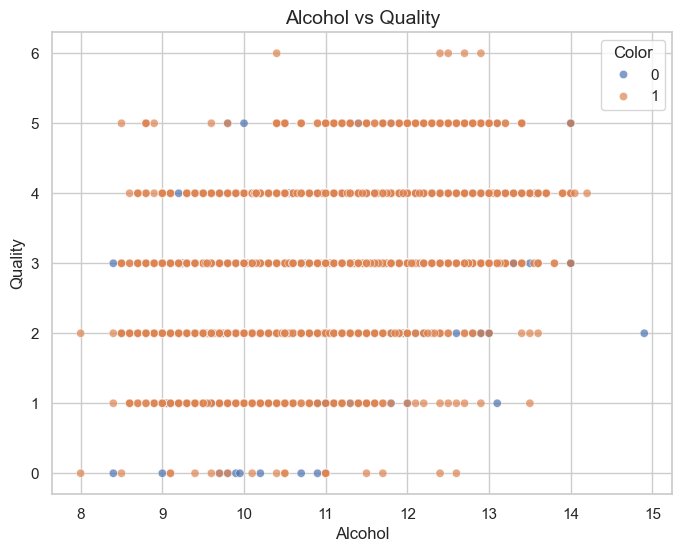

In [27]:
# 2. Scatter Plot of 'alcohol' vs 'quality'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', hue='color', data=df, alpha=0.7)
plt.title('Alcohol vs Quality', fontsize=14)
plt.xlabel('Alcohol', fontsize=12)
plt.ylabel('Quality', fontsize=12)
plt.legend(title='Color')
plt.show()

In [35]:
import plotly.io as pio

subject = df["quality"]
score = df["alcohol"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

In [36]:
subject = df["quality"]
score = df["pH"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

In [37]:
subject = df["quality"]
score = df["chlorides"]

data = [dict(x = subject, y = score, mode = "markers", type = "scatter",
             transforms = [dict(type = "groupby", groups = subject)])]

fig_dict = dict(data = data)
pio.show(fig_dict, validate = False)

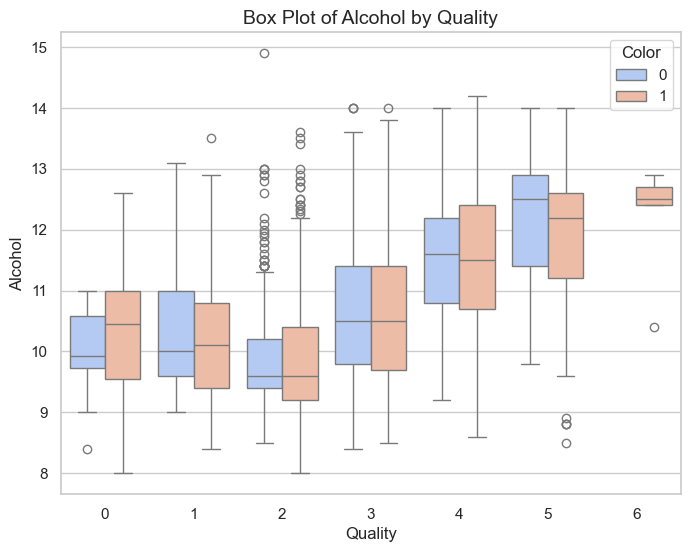

In [28]:
# 3. Box Plot of 'quality' vs 'alcohol'
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', hue='color', data=df, palette='coolwarm')
plt.title('Box Plot of Alcohol by Quality', fontsize=14)
plt.xlabel('Quality', fontsize=12)
plt.ylabel('Alcohol', fontsize=12)
plt.legend(title='Color')
plt.show()

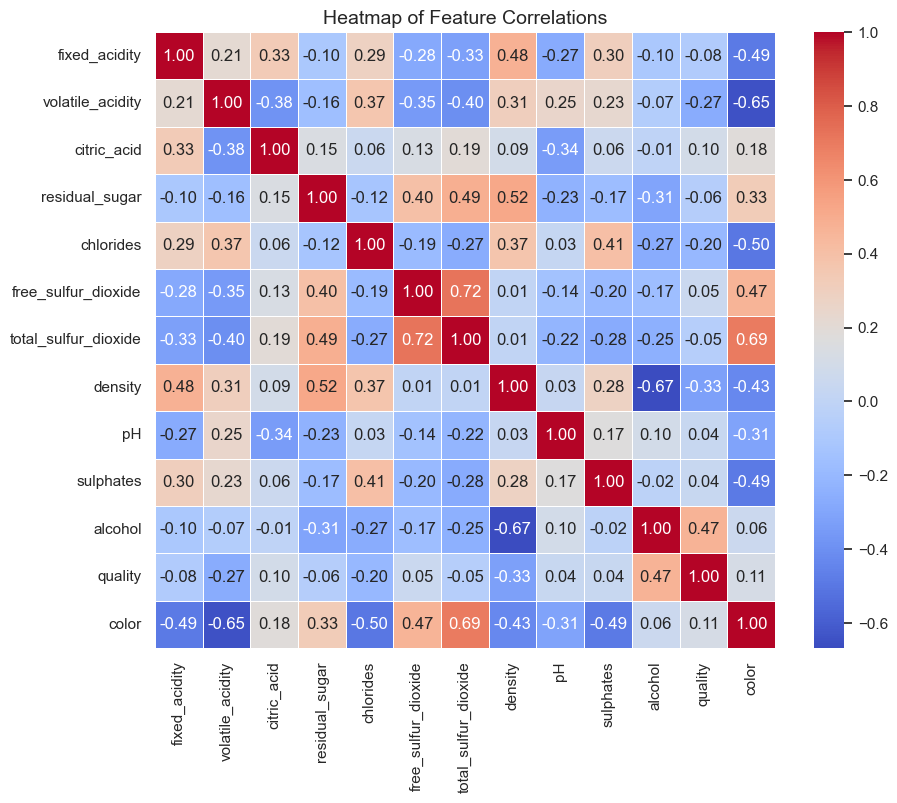

In [29]:
# 4. Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations', fontsize=14)
plt.show()


In [31]:
import plotly.express as px
fig = px.density_heatmap(df, x = "chlorides", y = "quality", text_auto = True,
                         color_continuous_scale = "sunsetdark")
fig.show()

In [32]:
import plotly.graph_objects as go

data = df
fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

In [33]:
data = df[["residual_sugar", "density", "sulphates", "chlorides", "quality"]]

fig = go.Figure(data = [go.Surface(z = data.values)])
fig.update_layout(autosize = True, width = 600, height = 600)

fig.show()

In [38]:
fig = px.ecdf(df, x = "alcohol", log_x = True, log_y = True, color = "quality")
fig.show()

In [39]:
fig = px.ecdf(df, x = "citric_acid", log_x = True, log_y = True, color = "quality")
fig.show()

In [40]:
fig = px.ecdf(df, x = ["pH", "sulphates", "alcohol"],
              marginal = "histogram", markers = False)
fig.show()

# **3 DL Steps**

In [41]:
x=df.drop("quality", axis=1)
y=df["quality"]

In [42]:
x

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  color  
0         9.4      0  
1         9.8      0  
2         9.8      0  
3         9.8      0  
4         9.4      0  
...       ...    ...  
5315     11.2      1  
5316      9.6      1  
5317      9.4      1  
5318     12.8      1  
5319     11.8      1  

[5320 rows x 12 columns]

In [43]:
y

0       2
1       2
2       2
3       3
4       2
       ..
5315    3
5316    2
5317    3
5318    4
5319    3
Name: quality, Length: 5320, dtype: int64

In [ ]:
# pip install tensorflow
# pip install --upgrade tensorflow
# pip install --upgrade keras

In [ ]:
# pip install keras, tensorflow, distutils
#one hot encoding
# pip install tensorflow.python

from keras.utils import to_categorical
y=to_categorical(y)

In [27]:
y

0       2
1       2
2       2
3       3
4       2
       ..
5315    3
5316    2
5317    3
5318    4
5319    3
Name: quality, Length: 5320, dtype: int64

In [28]:
df["quality"].head(10)

0    2
1    2
2    2
3    3
4    2
5    2
6    4
7    4
8    2
9    2
Name: quality, dtype: int64

In [29]:
y[0:10]

0    2
1    2
2    2
3    3
4    2
5    2
6    4
7    4
8    2
9    2
Name: quality, dtype: int64

In [30]:
x

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.66         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  color  
0         9.4      0  
1         9.8      0  
2         9.8      0  
3         9.8      0  
4         9.4      0  
...       ...    ...  
5315     11.2      1  
5316      9.6      1  
5317      9.4      1  
5318     12.8      1  
5319     11.8      1  

[5320 rows x 12 columns]

In [31]:
# pip install scikit-learn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x_scaler = scaler.transform(x)

In [32]:
x_scaler

array([[ 0.14006434,  2.11534878, -2.16451528, ...,  0.1779407 ,
        -0.96915199, -1.70723259],
       [ 0.44319875,  3.18529696, -2.16451528, ...,  0.97938943,
        -0.63183308, -1.70723259],
       [ 0.44319875,  2.47199817, -1.89267181, ...,  0.77902725,
        -0.63183308, -1.70723259],
       ...,
       [-0.54198809, -0.61896323, -0.87325881, ..., -0.48993324,
        -0.96915199,  0.58574327],
       [-1.29982413, -0.32175541, -0.12568928, ..., -1.0242324 ,
         1.89805872,  0.58574327],
       [-0.92090611, -0.79728793,  0.41799765, ..., -1.42495677,
         1.05476146,  0.58574327]])

In [33]:
x_scaler_df = pd.DataFrame(x_scaler, columns = x.columns)
x_scaler_df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.140064          2.115349    -2.164515       -0.699699   0.523880   
1          0.443199          3.185297    -2.164515       -0.544135   1.120736   
2          0.443199          2.471998    -1.892672       -0.610806   0.957957   
3          3.019841         -0.381197     1.641293       -0.699699   0.496751   
4          0.140064          1.877583    -2.164515       -0.721923   0.496751   
...             ...               ...          ...             ...        ...   
5315      -0.769339         -0.797288    -0.193650       -0.766370  -0.479922   
5316      -0.466204         -0.143431     0.282076        0.655929  -0.262884   
5317      -0.541988         -0.618963    -0.873259       -0.855263  -0.425662   
5318      -1.299824         -0.321755    -0.125689       -0.877487  -0.941128   
5319      -0.920906         -0.797288     0.417998       -0.944157  -0.995388   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -1.069272             -1.411143  1.100996  1.779304   
1               -0.282905             -0.829839  0.763753 -0.153797   
2               -0.844596             -1.058837  0.831202  0.220351   
3               -0.732258             -0.953146  1.168444 -0.403229   
4               -0.956934             -1.305451  1.100996  1.779304   
...                   ...                   ...       ...       ...   
5315            -0.339074             -0.389457 -1.145039  0.282710   
5316             1.514508              0.949305  0.122993 -0.465588   
5317            -0.002059             -0.054766 -0.672899 -1.463317   
5318            -0.563750             -0.072382 -1.971283  0.719216   
5319            -0.451412             -0.283765 -1.728468  0.220351   

      sulphates   alcohol     color  
0      0.177941 -0.969152 -1.707233  
1      0.979389 -0.631833 -1.707233  
2      0.779027 -0.631833 -1.707233  
3      0.311515 -0.631833 -1.707233  
4      0.177941 -0.969152 -1.707233  
...         ...       ...       ...  
5315  -0.222784  0.548783  0.585743  
5316  -0.489933 -0.800493  0.585743  
5317  -0.489933 -0.969152  0.585743  
5318  -1.024232  1.898059  0.585743  
5319  -1.424957  1.054761  0.585743  

[5320 rows x 12 columns]

**DATA SPLIT**

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaler_df, y, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4256, 12), (1064, 12), (4256,), (1064,))

**DEEP LEARNING**

In [ ]:
#inputlayer = 12 > hiddenlayer1 =512(activation="tanh") > hiddenlayer2 =256(activation="swish") hiddenlayer3 =64(activation="elu") outputlayer = 7 (activation="softmax")
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow as tf
dir(tf.keras.metrics)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(512,input_dim=12, activation="tanh"))
model.add(Dense(256,input_dim=12, activation="swish"))
model.add(Dense(64,input_dim=12, activation="elu"))
model.add(Dense(7, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()

In [ ]:
result=model.fit(x_train, y_train, epochs=100, validation_split=0.12, batch_size=16)

In [ ]:
result.history

In [ ]:
result_history_df = pd.DataFrame(result.history)
result_history_df

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 101), result_history_df["accuracy"], label="train accuracy")
plt.plot(range(1, 101), result_history_df["val_accuracy"], label="train val accuracy")
plt.legend()
plt.show()